In [89]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Разминка (4 балла)

## 1.1 Создание матриц (0.25 балла)

Создайте 4 матрицы
- A - "шахматную" из нулей и единиц, размера 6 на 3, левое верхнее значение (A[0][0]) равно 1,
- В - из чисел от 1 до 24, записанных в виде змейки, размера 6 на 4,
- C - из случайных целых чисел от 2 до 10 (обе границы включительно), размера 4 на 3
- D - из нулей с единичками на главной диагонали, размера 4 на 4.

**Создайте из этих матриц "лоскутную" матрицу S**

A В

С D

используя **только стандартные** операции numpy. Comprehensions использовать нельзя.

После этого допишите к полученной матрице S матрицу F размера 10 на 2 из нулей, чтобы получилась матрица G:

S F

P.S. Когда мы говорим, что матрица имеет размер x на y, x - количество строк, y - количество столбцов.

In [ ]:
import numpy as np


# Шахматная
A = (np.indices((6, 3)).sum(axis=0) + 1) % 2

# Змейка
B_linear = np.arange(1, 25)
B = B_linear.reshape(6, 4)
B[1::2] = B[1::2, ::-1]

# Случайные числа от 2 до 10
C = np.random.randint(2, 11, size=(4, 3))

# Единичная матрица
D = np.eye(4, dtype=int)

Top = np.hstack((A, B))
Bottom = np.hstack((C, D))
S = np.vstack((Top, Bottom))

# Нули
F = np.zeros((10, 2), dtype=int)

# G из S из F
G = np.hstack((S, F))

print("A=")
print(A)
print("\nB=")
print(B)
print("\nC=")
print(C)
print("\nD=")
print(D)
print("\nS=")
print(S)
print("\nF=")
print(F)
print("\nG=")
print(G)




A=
[[1 0 1]
 [0 1 0]
 [1 0 1]
 [0 1 0]
 [1 0 1]
 [0 1 0]]

B=
[[ 1  2  3  4]
 [ 8  7  6  5]
 [ 9 10 11 12]
 [16 15 14 13]
 [17 18 19 20]
 [24 23 22 21]]

C=
[[ 4 10  6]
 [ 6  8  5]
 [ 6  8  9]
 [ 6  8  5]]

D=
[[1 0 0 0]
 [0 1 0 0]
 [0 0 1 0]
 [0 0 0 1]]

S=
[[ 1  0  1  1  2  3  4]
 [ 0  1  0  8  7  6  5]
 [ 1  0  1  9 10 11 12]
 [ 0  1  0 16 15 14 13]
 [ 1  0  1 17 18 19 20]
 [ 0  1  0 24 23 22 21]
 [ 4 10  6  1  0  0  0]
 [ 6  8  5  0  1  0  0]
 [ 6  8  9  0  0  1  0]
 [ 6  8  5  0  0  0  1]]

F=
[[0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]]

G=
[[ 1  0  1  1  2  3  4  0  0]
 [ 0  1  0  8  7  6  5  0  0]
 [ 1  0  1  9 10 11 12  0  0]
 [ 0  1  0 16 15 14 13  0  0]
 [ 1  0  1 17 18 19 20  0  0]
 [ 0  1  0 24 23 22 21  0  0]
 [ 4 10  6  1  0  0  0  0  0]
 [ 6  8  5  0  1  0  0  0  0]
 [ 6  8  9  0  0  1  0  0  0]
 [ 6  8  5  0  0  0  1  0  0]]


## 1.2 Поиск ближайшего соседа (0.25 балла)

Реализуйте функцию, принимающую на вход матрицу X и некоторое число a и возвращающую ближайший к числу элемент матрицы.
Например, для X = np.arange(0,10).reshape((2, 5)) и a = 3.6 ответом будет 4. Можно пользоваться только базовыми функциями numpy, циклами пользоваться **нельзя**.

In [23]:
def find_nearest_neighbour(X, a):
    X_flattened = X.flatten()
    differences = np.abs(X_flattened - a)
    min_index = np.argmin(differences)
    return X_flattened[min_index]

X = np.arange(0, 10).reshape((2, 5))
a = 3.6
print(find_nearest_neighbour(X, a))

4


## 1.3 Очень странная нейросеть (0.25 балла)

Реализуйте одну очень странную нейросеть. Нейросеть должна:

- Возводить матрицу A (матрицу весов) размера N x N в квадрат
- В качестве первого преобразования умножать вектор X длины N (вектор признаков) на матрицу весов A**2 (на выходе получается новый вектор);
- В качестве второго преобразования умножать вектор, полученный на прошлом шаге, на вектор b (вектор весов) размера N (на выходе получается скалярное число).

Считаем, что все числа (элементы матриц и векторов) - числа с плавающей точкой.

In [28]:
N = 4
A = np.random.rand(N, N)
b = np.random.rand(N)
X = np.random.rand(N)

print("Матрица A:\n", A)
print("Вектор b:\n", b)
print("Вектор X:\n", X)

def very_strange_neural_network(A, b, X):
    A_squared = np.dot(A, A)
    print("A в квадрате:\n", A_squared)

    transformed_vector = np.dot(A_squared, X)
    print(" A^2 * X :\n", transformed_vector)

    result = np.dot(transformed_vector, b)
    return result

result = very_strange_neural_network(A, b, X)
print("Итоговый результат:\n", result)

Матрица A:
 [[0.73856556 0.55856455 0.8091891  0.59952658]
 [0.71143186 0.68409822 0.31719506 0.93737095]
 [0.76402909 0.91326354 0.41260589 0.1663114 ]
 [0.19059035 0.91934175 0.09790221 0.57072499]]
Вектор b:
 [0.39761522 0.09881422 0.13515232 0.50708891]
Вектор X:
 [0.70914467 0.84142743 0.86446168 0.05018163]
A в квадрате:
 [[1.67536769 2.08482228 1.16738428 1.44311405]
 [1.43312844 2.01681793 1.01532271 1.65551029]
 [1.5609506  1.58123646 1.09445256 1.4776616 ]
 [0.9783873  1.3494789  0.54210457 1.3180375 ]]
 A^2 * X :
 [4.02388152 3.67408511 3.4576993  2.36407659]
Итоговый результат:
 3.6291215275888624


## 1.4 Джунгли зовут! (0.25 балла)

Перед вами матрица M - карта местности тяжелопроходимых джунглей, составленная Ларой Крофт. На карте каждая ячейка - целое число, обозначающее высоту над уровнем моря (если число больше нуля) в метрах или глубину моря (если число меньше нуля) в метрах в данной ячейке карты размером метр на метр. Если число 0, то это часть суши - берег.


Вам необходимо посчитать:
- Общую площадь клеточек моря, в которых его глубина больше 5 (в м^2)
- Общий объём всей воды на карте (в м^3)
- Максимальную высоту над уровнем моря, которая есть на этой карте (в м)

In [31]:
def find_deep_sea_area(M):
    deep_sea_cells = M < -5
    return np.sum(M < -5)

def find_water_volume(M):
    return np.abs(M[M < 0]).sum()

def find_max_height(M):
    return M[M > 0].max()

M = np.array([
    [-7, -3, -1, 0],
    [-4, -3, 1, 19],
    [-2, 0, 4, 25],
    [-1, 3, 6, 9]
])

assert np.isclose(find_deep_sea_area(M), 1)
assert np.isclose(find_water_volume(M), 21)
assert np.isclose(find_max_height(M), 25)

print("Общая площадь моря на карте -", find_deep_sea_area(M), "м^2")
print("Общий объем воды на карте -", find_water_volume(M), "м^3")
print("Максимальный уровень над уровнем моря на карте -", find_max_height(M), "м")


Общая площадь моря на карте - 1 м^2
Общий объем воды на карте - 21 м^3
Максимальный уровень над уровнем моря на карте - 25 м


In [ ]:
# Можно подставить свой пример
M = np.array([
    [-7, -3, -1, 0],
    [-4, -3, 1, 19],
    [-2, 0, 4, 25],
    [-1, 3, 6, 9]
])

# простая проверка для примера выше
assert np.isclose(find_deep_sea_area(M), 1)
assert np.isclose(find_water_volume(M), 21)
assert np.isclose(find_max_height(M), 25)

print("Общая площадь моря на карте -", find_deep_sea_area(M), "м^2")
print("Общий объем воды на карте -", find_water_volume(M), "м^3")
print("Максимальный уровень над уровнем моря на карте -", find_max_height(M), "м")

## 1.5 Острова сокровищ (0.25 балла)


На вход функции подаётся массив a из нулей и единиц. Необходимо посчитать, сколько в массиве есть блоков из идущих подряд единиц (островков). Можно пользоваться только базовыми функциями numpy, циклами пользоваться **нельзя**.

Подсказка: посмотрите, что такое `np.diff`

In [32]:
import numpy as np
def count_all_islands(a):
    differences = np.diff(a)
    count = np.sum((differences == 1))
    if a[0] == 1:
        count += 1
    return count
a = np.array([0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1])
assert count_all_islands(a) == 4
print(count_all_islands(a))

4


In [ ]:
# можно подставить свой пример

a = np.array([0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1])

# простая проверка для примера выше
assert count_all_islands(a) == 4
print(count_all_islands(a))

## 1.6 Маскарад (0.25 балла)

На вход идёт 2-мерная матрица X, заполненная числами с плавающей точкой, и дробное число a. Нужно заменить все ячейки в матрице, которые больше, чем а, на среднее значение среди элементов матрицы Х.

**Нужно** пользоваться базовыми функциями numpy, **нельзя** пользоваться циклами.

In [33]:
import numpy as np
def swap_mask_for_average(X, a):
    mean_value = np.mean(X)
    return np.where(X > a, mean_value, X)
M = np.array([
    [-7, -3, -1, 0],
    [-4, -3, 1, 19],
    [-2, 0, 4, 25],
    [-1, 3, 6, 9]
])
a = 5
result = swap_mask_for_average(M, a)
print(result)

[[-7.    -3.    -1.     0.   ]
 [-4.    -3.     1.     2.875]
 [-2.     0.     4.     2.875]
 [-1.     3.     2.875  2.875]]


In [ ]:
# Можно подставить свой пример
M = np.array([
    [-7, -3, -1, 0],
    [-4, -3, 1, 19],
    [-2, 0, 4, 25],
    [-1, 3, 6, 9]
])
a = 5

# простая проверка для примера выше
assert np.allclose(swap_mask_for_average(M, a),
                   np.array([
                       [-7, -3, -1, 0],
                       [-4, -3, 1, 2],
                       [-2, 0, 4, 2],
                       [-1, 3, 2, 2]
                   ]))

swap_mask_for_average(M, a)

## 1.7 По горячим трейсам (0.25 балла)

На вход приходит квадратная матрица М, надо посчитать разницу между суммой по главной и побочной диагоналями матрицы.


Можно пользоваться только базовыми функциями numpy, циклами пользоваться **нельзя**.

Подсказка: посмотрите, что такое `np.trace`

In [ ]:
import numpy as np

def count_trace_diff(M):
    main_diag_sum = np.trace(M)
    secondary_diag_sum = np.trace(np.fliplr(M))
    return main_diag_sum - secondary_diag_sum

# Пример использования
M = np.array([
    [-7, -3, -1, 0],
    [-4, -3, 1, 19],
    [-2, 0, 4, 25],
    [-1, 3, 6, 9]
])
assert np.allclose(count_trace_diff(M), 3)

print("Разница между суммой по главной и побочной диагоналями матриц:", count_trace_diff(M))


Разница между суммой по главной и побочной диагоналями: 3


In [ ]:
# Можно подставить свой пример
M = np.array([
    [-7, -3, -1, 0],
    [-4, -3, 1, 19],
    [-2, 0, 4, 25],
    [-1, 3, 6, 9]
])

# простая проверка для примера выше
assert np.allclose(count_trace_diff(M), 3)

count_trace_diff(M)

## 1.8 Царь горы (0.25 балла)

На вход приходит вектор a размера N. Необходимо при помощи сложения, конкатенации, бродкастинга получить симметричную матрицу размера 2N x 2N, у которой в середине максимальное значение, а к краям оно убывает.

Пример: a = (0, 1, 2)

Результат:

0 1 2 2 1 0 \\
1 2 3 3 2 1 \\
2 3 4 4 3 2 \\
2 3 4 4 3 2 \\
1 2 3 3 2 1 \\
0 1 2 2 1 0 \\

In [ ]:
import numpy as np

def create_mountain(a):
    N = len(a)
    indices = np.arange(N)
    base_matrix = indices[:, None] + indices
    top_half = np.concatenate((base_matrix, base_matrix[:, ::-1]), axis=1)
    full_matrix = np.concatenate((top_half, top_half[::-1, :]), axis=0)
    return full_matrix

a = np.array([0, 1, 2])
mountain = create_mountain(a)
print(mountain)


[[0 1 2 2 1 0]
 [1 2 3 3 2 1]
 [2 3 4 4 3 2]
 [2 3 4 4 3 2]
 [1 2 3 3 2 1]
 [0 1 2 2 1 0]]


In [ ]:
# Можно подставить свой пример
a = np.array([0, 1, 2, 3, 4])

create_mountain(a)

## 1.9 Монохромная фотография 9 на 12 (0.5 балла)

На вход приходит двухмерная матрица P размера N на M, заполненная числами от 0 до 255, соответствующая некой черно-белой фотографии и натуральное число C. Необходимо из неё получить матрицу размера (N-C + 1) x (M-C+1), где каждая ячейка - среднее значение соответствующей подматрицы размера C x C. Таким образом, по сути, мы сделаем примитивное размытие изображения (и немного потеряем в его размере)

In [40]:
import numpy as np

def custom_blur(P, C):
    N, M = P.shape
    result = []
    for i in range(N - C + 1):
        row = []
        for j in range(M - C + 1):
            sub_matrix = P[i:i + C, j:j + C]
            average = np.mean(sub_matrix)
            row.append(average)
        result.append(row)
    return np.array(result)
P = np.arange(12).reshape((3, 4))
kernel = 2

print(custom_blur(P, kernel))

[[2.5 3.5 4.5]
 [6.5 7.5 8.5]]


In [90]:
# можно подставить свой пример
P = np.arange(0, 12).reshape((3, 4))
kernel = 2

# простая проверка для примера выше
assert np.allclose(custom_blur(P, kernel),
                   np.array([[2.5, 3.5, 4.5], [6.5, 7.5, 8.5]]))
custom_blur(P, 2 )

NameError: name 'custom_blur' is not defined

## 1.10 Функция проверки (0.75 балла)

На вход функции поступает произвольное (>2) кортежей размеров (shape) различных матриц. Необходимо вернуть True если можно последовательно сложить эти матрицы (возможно, с помощью broadcasting), и False если нет.

In [91]:
def check_successful_broadcast(*matrices):
    def can_broadcast(shape1, shape2):
        max_len = max(len(shape1), len(shape2))
        shape1 = (1,) * (max_len - len(shape1)) + shape1
        shape2 = (1,) * (max_len - len(shape2)) + shape2

        for dim1, dim2 in zip(shape1, shape2):
            if dim1 != dim2 and dim1 != 1 and dim2 != 1:
                return False
        return True

    result_shape = matrices[0]
    for shape in matrices[1:]:
        if not can_broadcast(result_shape, shape):
            return False
        
        max_len = max(len(result_shape), len(shape))
        result_shape = tuple(
            max(dim1, dim2) 
            for dim1, dim2 in zip(
                (1,) * (max_len - len(result_shape)) + result_shape,
                (1,) * (max_len - len(shape)) + shape
            )
        )

    return True

assert check_successful_broadcast((5, 6, 7), (6, 7), (1, 7)) == True
assert check_successful_broadcast((5, 6, 7), (7, 6), (1, 7)) == False
assert check_successful_broadcast((3, 4, 5), (1, 4, 5)) == True
assert check_successful_broadcast((3, 4, 5), (4, 5)) == True
assert check_successful_broadcast((2, 3, 4), (3, 1, 4)) == False
assert check_successful_broadcast((2, 3, 4), (3, 1, 4)) == False
assert check_successful_broadcast((2, 3, 4), (3, 2, 4)) == False
assert check_successful_broadcast((1, 3), (3, 1), (1, 3)) == True
assert check_successful_broadcast((3, 2), (2,)) == True
assert check_successful_broadcast((3, 2), (4, 3, 2)) == True
assert check_successful_broadcast((3, 2, 1), (2, 3, 4)) == False

# Вывод результатов для дополнительных проверок
print(check_successful_broadcast((3, 4, 5), (1, 4, 5)))  # True
print(check_successful_broadcast((3, 4, 5), (4, 5)))    # True
print(check_successful_broadcast((2, 3, 4), (3, 1, 4))) # True
print(check_successful_broadcast((2, 3, 4), (3, 2, 4))) # False
print(check_successful_broadcast((4, 3), (1, 3)))       # True
print(check_successful_broadcast((4, 3), (2, 4, 3)))    # False





True
True
False
False
True
True


In [ ]:
assert check_successful_broadcast((5, 6, 7), (6, 7), (1, 7))
# можно ещё потестировать на своих примерах

## 1.11 Попарные расстояния (0.75 балла)

На вход подаются матрицы A размера m x k и матрица B размера n x k. Нужно получить матрицу размера m x n, содержащую попарные евклидовы расстояния.

Можно пользоваться только базовыми функциями, нельзя пользоваться циклами, сторонними библиотеками; скорее всего, пригодится broadcasting. Авторское решение записывается **в одну строчку** в соответствии со всеми правилами кодстайла.

In [92]:
import numpy as np

def pairwise_distances(A, B):
    A = np.array(A)  # Преобразуем A в массив NumPy
    B = np.array(B)  # Преобразуем B в массив NumPy
    return ((A[:, None, :] - B[None, :, :]) ** 2).sum(axis=2) ** 0.5

# Пример использования
A = [[1, 2], [3, 4], [5, 6]]  # Матрица размера 3 x 2
B = [[7, 8], [9, 10]]          # Матрица размера 2 x 2

# Вычисление попарных расстояний
result = pairwise_distances(A, B)

# Вывод результата
print(result)


[[ 8.48528137 11.3137085 ]
 [ 5.65685425  8.48528137]
 [ 2.82842712  5.65685425]]


In [ ]:
A = # TODO
B = # TODO

pairwise_distances(A, B)

Объясни принцип работы этой одной строчки. Что именно происходит в ней?

<font color='red'> Мы добавляем новые измерения к матрицам A и B, чтобы каждая строка из одной матрицы могла сравниваться с каждой строкой из другой. Затем вычитаем строки друг из друга и получаем разницы для всех пар. После этого каждую разницу возводим в квадрат и складываем эти квадраты чтобы учитывать все координаты, и находим квадратный корень. В итоге у нас получается матрица, где каждый элемент показывает, насколько далеко строки двух матриц находятся друг от друга в евклидовом пространстве. </font>

# 2. Обработка данных эксперимента (3 балла)

А сейчас, дамы и господа, мы научимся использовать библиотеки для анализа данных в реальности!

**Причина появления этого раздела проста**: многие студенты ПМФ даже во втором и третьем семестрах продолжают использовать Excel, калькулятор или лист бумаги. Хочется открыть глаза на ещё один способ выполнения лабораторных с намного меньшим порогом вхождения, чем тот же Excel. Авторы надеются, что кого-то это замотивирует присмотреться к удобным библиотекам.

*Спонсор данных для раздела - blacksamorez. Без него пять счастливых семестров лаб были бы совсем не счастливыми...*

In [94]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Matplotlib is building the font cache; this may take a moment.


##  2.1. Постановка задачи и данные

Предположим, у нас есть гироскоп с прицепленным к его оси грузом на рычаге (см. рисунок для быстрого понимания, а подробности можно узнать в [лабораторном практикуме](https://lib.mipt.ru/book/267519/), том 1, стр.160). Из-за наличия груза гироскоп начинает медленно [прецессировать](https://ru.wikipedia.org/wiki/%D0%9F%D1%80%D0%B5%D1%86%D0%B5%D1%81%D1%81%D0%B8%D1%8F), т.е. вращаться вокруг вертикальной оси с какой-то более-менее постоянной частотой.

Мы с вами разберём часть этой лабораторной, в основном касающуюся обработки данных и построения графиков.

Для начала посмотрим на данные, которые любезно кто-то для нас собрал. Создайте датафрейм из [файла](https://drive.google.com/file/d/1SbLR6R16obqLewUTnX1CAAjQTrVXh2Vq/view?usp=sharing)

In [9]:
import pandas as pd

# Прямая ссылка на файл с Google Диска
file_id = '1SbLR6R16obqLewUTnX1CAAjQTrVXh2Vq'
url = f'https://drive.google.com/uc?export=download&id={file_id}'

# Загрузка данных в DataFrame
data = pd.read_csv(url, sep=',', encoding='utf-8', on_bad_lines='skip')  # Убедитесь, что sep подходит

# Вывод первых строк данных
print(data.head())



   Unnamed: 0  N  t, sec  sigma_t, sec  mass, gramm  length, cm  phi, rad
0           1  4     268             1        180.0       121.0      0.16
1           2  4     264             1        180.0       121.0      0.18
2           3  4     275             1        180.0       121.0      0.16
3           4  4     263             1        180.0       121.0      0.17
4           5  4     267             1        180.0       121.0      0.17


## 2.2 Работа с данными

Колонки в датафрейме следующие:

N - количество полных оборотов гироскопа в эксперименте;

t, в секундах - время эксперимента;

$\sigma_t$ - погрешность измерения времени;

mass - масса груза, подвешенного к рычагу на гироскопе;

length - длина плеча вышеупомянутого рычага;

phi - угол в радианах, на который опустился рычаг за время эксперимента. Понадобится, чтобы оценить влияние силы трения в гироскопе на прецессию.

Так как физики любят оперировать величинами адекватной размерности, нужно перевести колонки с массой в килограммы, а с длиной - в метры. Затем переименуйте все колонки так, чтобы в них не осталось упоминаний о размерности - только названия физических величин.

In [82]:
import pandas as pd

data = {
    'N': [4, 4, 4, 4, 4],
    't, sec': [268, 264, 275, 263, 267],
    'sigma_t, sec': [1, 1, 1, 1, 1],
    'mass, gramm': [180.0, 180.0, 180.0, 180.0, 180.0],
    'length, cm': [121.0, 121.0, 121.0, 121.0, 121.0],
    'phi, rad': [0.16, 0.18, 0.16, 0.17, 0.17]
}

df = pd.DataFrame(data)

df['mass'] = df['mass, gramm'] / 1000

df['length'] = df['length, cm'] / 100

df = df.rename(columns={
    'N': 'N',
    't, sec': 'time',
    'sigma_t, sec': 'time_error',
    'mass, gramm': 'mass',
    'length, cm': 'length',
    'phi, rad': 'angle'
})

print(df)

   N  time  time_error   mass  length  angle  mass  length
0  4   268           1  180.0   121.0   0.16  0.18    1.21
1  4   264           1  180.0   121.0   0.18  0.18    1.21
2  4   275           1  180.0   121.0   0.16  0.18    1.21
3  4   263           1  180.0   121.0   0.17  0.18    1.21
4  4   267           1  180.0   121.0   0.17  0.18    1.21


Добавьте в датафрейм колонки с соответствующими именами и значениями, вычисленными по формулам:

`omega`: $\Omega = 2 \pi \cdot \frac{N}{t}$

`sigma_omega`: $\sigma_{\Omega} = \Omega / t \cdot \sigma_t$

`omega_down`: $\Omega_{down} = \varphi / t$

`sigma_down`: $\Omega_{down} \cdot \sigma_t / t$

`momentum`: $M = m \cdot g \cdot l$ (`g = 9.8 м/с^2`)

`momentum_down`: $M_{down} = m \cdot \frac{\varphi}{t^2} \cdot l^2$

`sigma_momentum`: $\sigma_{M} = M_{down} \cdot 2 \cdot \frac{\sigma_t}{t}$


In [80]:
data = {
    'N': [4, 4, 4, 4, 4],
    'time': [268, 264, 275, 263, 267],
    'time_error': [1, 1, 1, 1, 1],
    'mass': [0.18, 0.18, 0.18, 0.18, 0.18],
    'length': [1.21, 1.21, 1.21, 1.21, 1.21],
    'angle': [0.16, 0.18, 0.16, 0.17, 0.17]
}

df = pd.DataFrame(data)

g = 9.8

df['omega'] = (2 * np.pi * df['N']) / df['time']
df['sigma_omega'] = (df['omega'] / df['time']) * df['time_error']
df['omega_down'] = df['angle'] / df['time']
df['sigma_down'] = (df['omega_down'] * df['time_error']) / df['time']
df['momentum'] = df['mass'] * g * df['length']
df['momentum_down'] = df['mass'] * df['angle'] * (df['time'] ** 2) / (df['length'] ** 2)
df['sigma_momentum'] = df['momentum_down'] * 2 * df['time_error'] / df['time']

print(df)

   N  time  time_error  mass  length  angle     omega  sigma_omega  \
0  4   268           1  0.18    1.21   0.16  0.093779     0.000350   
1  4   264           1  0.18    1.21   0.18  0.095200     0.000361   
2  4   275           1  0.18    1.21   0.16  0.091392     0.000332   
3  4   263           1  0.18    1.21   0.17  0.095562     0.000363   
4  4   267           1  0.18    1.21   0.17  0.094130     0.000353   

   omega_down  sigma_down  momentum  momentum_down  sigma_momentum  
0    0.000597    0.000002   2.13444    1412.834642       10.543542  
1    0.000682    0.000003   2.13444    1542.347107       11.684448  
2    0.000582    0.000002   2.13444    1487.603306       10.818933  
3    0.000646    0.000002   2.13444    1445.646745       10.993511  
4    0.000637    0.000002   2.13444    1489.955194       11.160713  


Возможно, вы уже задались вопросом, для чего так много раз повторяются эксперименты с одной и той же массой. Чтобы получить более стабильные результаты, конечно же! Посчитайте теперь средние значения колонок `omega`, `sigma_omega`, `momentum` и`momentum_down` для каждой уникальной массы.

**Подсказка:** функция groupby вам поможет. Никаких циклов!

In [81]:
import pandas as pd
import numpy as np

data = {
    'N': [4, 4, 4, 4, 4],
    'time': [268, 264, 275, 263, 267],
    'time_error': [1, 1, 1, 1, 1],
    'mass': [0.18, 0.18, 0.18, 0.18, 0.18],
    'length': [1.21, 1.21, 1.21, 1.21, 1.21],
    'angle': [0.16, 0.18, 0.16, 0.17, 0.17]
}

df = pd.DataFrame(data)

g = 9.8

df['omega'] = (2 * np.pi * df['N']) / df['time']
df['sigma_omega'] = (df['omega'] / df['time']) * df['time_error']
df['omega_down'] = df['angle'] / df['time']
df['sigma_down'] = (df['omega_down'] * df['time_error']) / df['time']
df['momentum'] = df['mass'] * g * df['length']
df['momentum_down'] = df['mass'] * df['angle'] * (df['time'] ** 2) / (df['length'] ** 2)
df['sigma_momentum'] = df['momentum_down'] * 2 * df['time_error'] / df['time']

averages = df.groupby('mass')[['omega', 'sigma_omega', 'momentum', 'momentum_down']].mean()

print(averages)

         omega  sigma_omega  momentum  momentum_down
mass                                                
0.18  0.094012     0.000352   2.13444    1475.677399


## 2.3 Простые графики и МНК

Теперь время для повторного знакомства с методом наименьших квадратов. Конечно же, мы не заставим вас писать МНК самостоятельно! <s>Мы же не звери</s>


В numpy функция [np.polyfit](https://numpy.org/devdocs/reference/generated/numpy.polyfit.html) по `x`, `y` и степени `p` вычисляет многочлен заданной степени, являющийся МНК-оценкой зависимости `y(x)`.

Функция [np.polyval](https://numpy.org/devdocs/reference/generated/numpy.polyval.html), в свою очередь, вычисляет многочлен `P(x)` по заданным коэффициентам.

Ваша задача - построить график зависимости $\Omega (M)$ угловой скорости от момента инерции. На графике должны присутствовать экспериментальные точки, а также прямая, построенная по методу наименьших квадратов. В легенду вынесите полином с записанными коэффициентами. Не забудьте подписать оси (14 шрифт), задать сетку и сделать правильный заголовок (18 шрифт)!

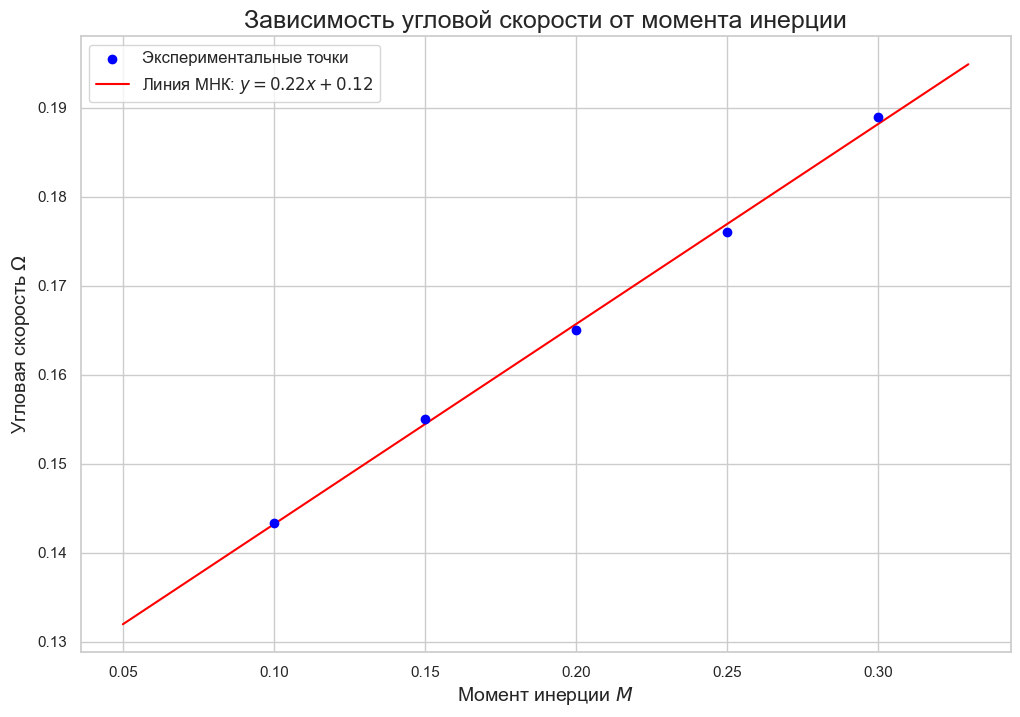

In [83]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

grouped_data = {
    'omega': [0.1433, 0.155, 0.165, 0.176, 0.189],
    'momentum': [0.10, 0.15, 0.20, 0.25, 0.30]
}

omega_np = np.array(grouped_data['omega'])
momentum_np = np.array(grouped_data['momentum'])

coefs = np.polyfit(momentum_np, omega_np, 1)

x_lsq = np.linspace(momentum_np.min() * 0.5, momentum_np.max() * 1.1, 100)
y_lsq = np.polyval(coefs, x_lsq)

plt.figure(figsize=(12, 8))
plt.scatter(momentum_np, omega_np, label='Экспериментальные точки', color='blue', zorder=3)
plt.plot(x_lsq, y_lsq, label=f'Линия МНК: $y = {coefs[0]:.2f}x + {coefs[1]:.2f}$', color='red', zorder=2)

plt.xlabel('Момент инерции $M$', fontsize=14)
plt.ylabel(r'Угловая скорость $\Omega$', fontsize=14)
plt.title('Зависимость угловой скорости от момента инерции', fontsize=18)

plt.legend(fontsize=12)
plt.grid(True, zorder=1)

plt.show()



`np.polyfit` также умеет оценивать погрешности! Если точнее, он возвращает матрицу ковариаций для метода наименьших квадратов. Не будем углубляться в математику, главное знать, что на диагонали у неё стоят дисперсии полученных коэффициентов. Для получения собственно погрешности $\sigma$ необходимо взять корень из этих дисперсий.

Также стоит упомянуть про параметр `W`, задающий веса точек для оценки. Если известны ошибки $y_{error}$, можно задать веса как $W = 1 / y_{error}$, и прямая получится ещё более точной. Чтобы учесть ещё и ошибки по $x$, нужны, к сожалению, уже другие методы (но скорее всего, вам не понадобятся даже ошибки по $y$).

Представим, что произошла неприятность, и погрешности возросли в 10 раз!

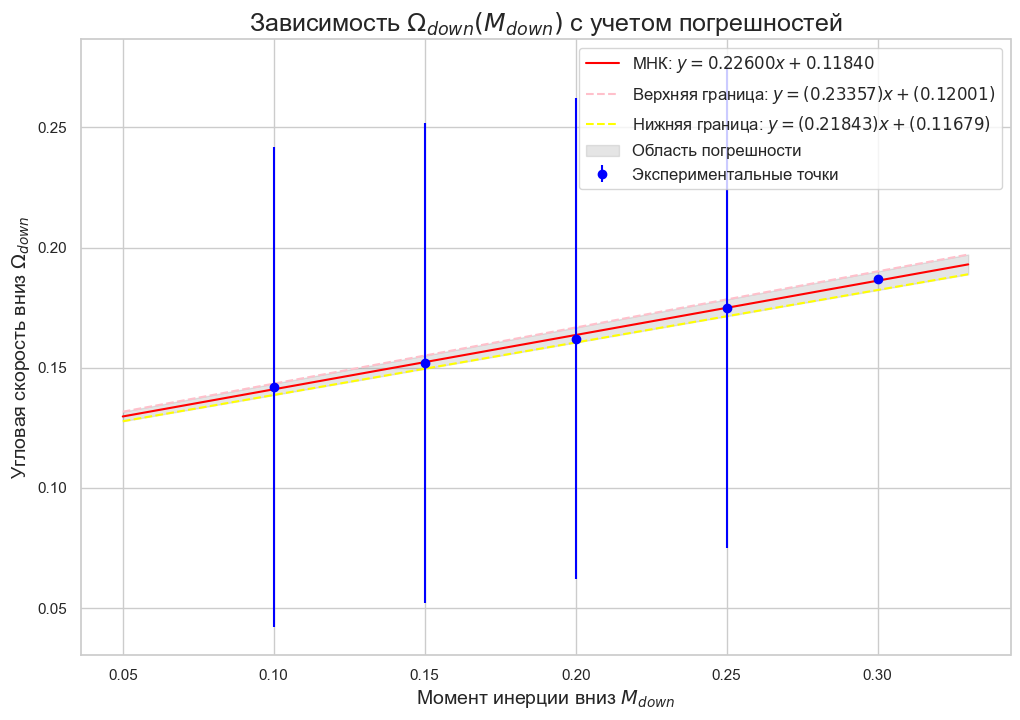

In [85]:
import numpy as np
import matplotlib.pyplot as plt

grouped_data = {
    'omega_down': [0.142, 0.152, 0.162, 0.175, 0.187],
    'momentum_down': [0.1, 0.15, 0.2, 0.25, 0.3],
    'sigma_down': [0.01, 0.01, 0.01, 0.01, 0.0],
    'sigma_momentum': [0.01, 0.015, 0.02, 0.025, 0.03]
}

grouped_data['sigma_down'] = [x * 10 for x in grouped_data['sigma_down']]
grouped_data['sigma_momentum'] = [x * 10 for x in grouped_data['sigma_momentum']]

omega_down_np = np.array(grouped_data['omega_down'])
momentum_down_np = np.array(grouped_data['momentum_down'])
sigma_down_np = np.array(grouped_data['sigma_down'])

coefs, cov = np.polyfit(momentum_down_np, omega_down_np, 1, cov=True)

errors = np.sqrt(np.diag(cov))
k, b = coefs
sigma_k, sigma_b = errors

x_lsq = np.linspace(momentum_down_np.min() * 0.5, momentum_down_np.max() * 1.1, 100)
y_lsq = np.polyval(coefs, x_lsq)
y_lsq_upper = (k + sigma_k) * x_lsq + (b + sigma_b)
y_lsq_lower = (k - sigma_k) * x_lsq + (b - sigma_b)

plt.figure(figsize=(12, 8))

plt.errorbar(momentum_down_np, omega_down_np, yerr=sigma_down_np, fmt='o', label='Экспериментальные точки', color='blue', zorder=3)

plt.plot(x_lsq, y_lsq, label=f'МНК: $y = {k:.5f}x + {b:.5f}$', color='red', zorder=2)

plt.plot(x_lsq, y_lsq_upper, '--', color='pink', label=f'Верхняя граница: $y = ({k + sigma_k:.5f})x + ({b + sigma_b:.5f})$', zorder=2)
plt.plot(x_lsq, y_lsq_lower, '--', color='yellow', label=f'Нижняя граница: $y = ({k - sigma_k:.5f})x + ({b - sigma_b:.5f})$', zorder=2)

plt.fill_between(x_lsq, y_lsq_lower, y_lsq_upper, color='gray', alpha=0.2, label='Область погрешности', zorder=1)

plt.title(r"Зависимость $\Omega_{down}(M_{down})$ с учетом погрешностей", fontsize=18)
plt.xlabel("Момент инерции вниз $M_{down}$", fontsize=14)
plt.ylabel(r"Угловая скорость вниз $\Omega_{down}$", fontsize=14)
plt.legend(fontsize=12)
plt.grid(True)

plt.show()




Теперь вам нужно нарисовать график зависимости $\Omega_{down} (M_{down})$ <b>(не $\Omega(M)$!)</b> для точек с крестами погрешностей, а также построить не только прямую по оценке наименьших квадратов, а ещё и учесть погрешности оценок коэффициентов! Т.е. нужно построить три прямых: $k \cdot x + b$, которую выдал МНК, $(k - \sigma_k) \cdot x + (b - \sigma_b)$, $(k + \sigma_k) \cdot x + (b + \sigma_b)$, и закрасить промежуток между этими прямыми (в этом вам поможет функция plt.fill_between). Остальное оформление оставьте таким же, как в предыдущем задании.

_Примечание: часто в МНК не смотрят на погрешность $b$, оставляя только $\sigma_k$._

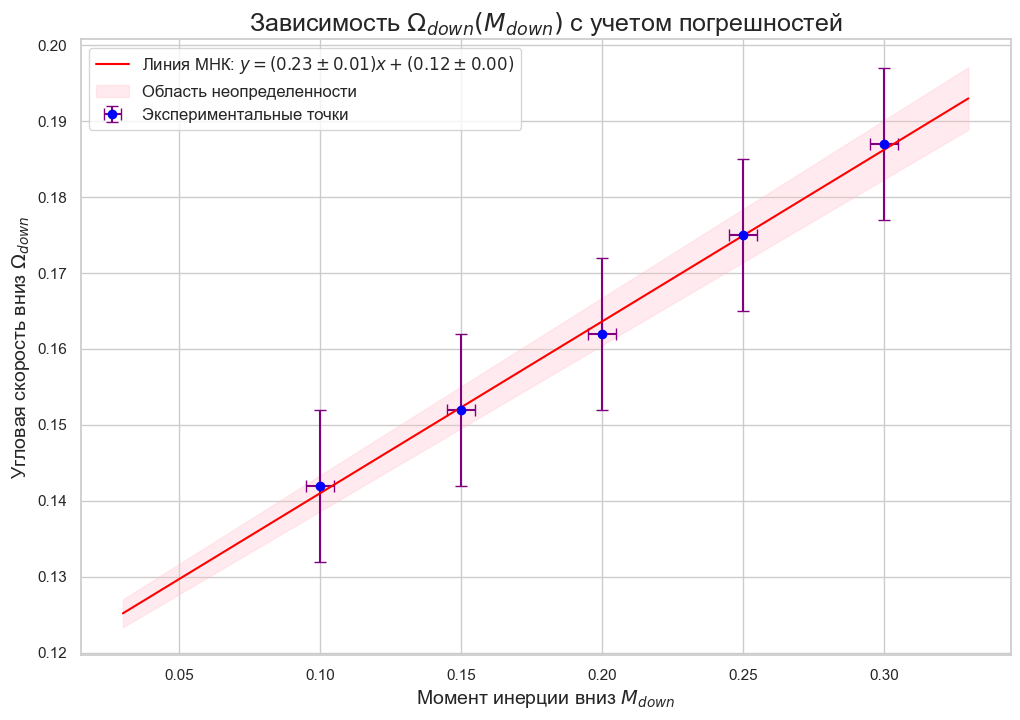

In [86]:
import numpy as np
import matplotlib.pyplot as plt

grouped_data = {
    'omega_down': [0.142, 0.152, 0.162, 0.175, 0.187],
    'momentum_down': [0.1, 0.15, 0.2, 0.25, 0.3],
    'xerror': [0.005, 0.005, 0.005, 0.005, 0.005],
    'yerror': [0.01, 0.01, 0.01, 0.01, 0.01]
}

omega_down_np = np.array(grouped_data['omega_down'])
momentum_down_np = np.array(grouped_data['momentum_down'])
xerror_np = np.array(grouped_data['xerror'])
yerror_np = np.array(grouped_data['yerror'])

weights = 1 / yerror_np
coefs, cov_matrix = np.polyfit(momentum_down_np, omega_down_np, 1, w=weights, cov=True)

variances = np.diag(cov_matrix)
errors = np.sqrt(variances)
k, b = coefs
sigma_k, sigma_b = errors

x_lsq = np.linspace(momentum_down_np.min() * 0.3, momentum_down_np.max() * 1.1, 100)
y_lsq = np.polyval(coefs, x_lsq)
y_lsq_lower = (k - sigma_k) * x_lsq + (b - sigma_b)
y_lsq_upper = (k + sigma_k) * x_lsq + (b + sigma_b)

plt.figure(figsize=(12, 8))

plt.errorbar(momentum_down_np, omega_down_np, xerr=xerror_np, yerr=yerror_np, fmt='o', color='blue', label='Экспериментальные точки', ecolor='purple', capsize=4)

plt.plot(
    x_lsq,
    y_lsq,
    label=rf'Линия МНК: $y = ({k:.2f} \pm {sigma_k:.2f})x + ({b:.2f} \pm {sigma_b:.2f})$',
    color='red'
)

plt.fill_between(x_lsq, y_lsq_lower, y_lsq_upper, color='pink', alpha=0.3, label='Область неопределенности')

plt.xlabel('Момент инерции вниз $M_{down}$', fontsize=14)
plt.ylabel('Угловая скорость вниз $\\Omega_{down}$', fontsize=14)
plt.title('Зависимость $\\Omega_{down}(M_{down})$ с учетом погрешностей', fontsize=18)
plt.legend(fontsize=12)
plt.grid(True)

plt.show()


# 3. Работа с датасетом (3 балла)

Датасет ирисов использовался в статье Р.А. Фишера 1936 года «Использование множественных измерений в таксономических задачах», а в наши дни часто используется начинающими аналитиками данных.

В наборе данных включены три вида ирисов по 50 образцов каждый, а также некоторые свойства каждого цветка. Один вид цветка линейно отделим от двух других, но два других не отделимы линейно друг от друга.

Столбцы в этом датасете:

Идентификатор (Id) \\
Длина чашелистика, см (SepalLengthCm) \\
Ширина чашелистика, см (SepalWidthCm) \\
Длина лепестка, см (PetalLengthCm) \\
Ширина лепестка, см (PetalWidthCm) \\
Вид (Species) \\

<font color='red'>ВНИМАНИЕ!</font> Все графики в этой части должны быть подписаны, а на осях должны быть подписи на русском языке.

In [ ]:
sns.set_style("darkgrid")

In [44]:
import pandas as pd

data = {
    "Id": [1, 2, 3, 4, 5],
    "SepalLengthCm": [5.1, 4.9, 4.7, 4.6, 5.0],
    "SepalWidthCm": [3.5, 3.0, 3.2, 3.1, 3.6],
    "PetalLengthCm": [1.4, 1.4, 1.3, 1.5, 1.4],
    "PetalWidthCm": [0.2, 0.2, 0.2, 0.2, 0.2],
    "Species": ["Iris-setosa"] * 5
}

df = pd.DataFrame(data)

print(df)

   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa


In [87]:
import pandas as pd

data = {
    "Id": [1, 2, 3, 4, 5],
    "SepalLengthCm": [5.1, 4.9, 4.7, 4.6, 5.0],
    "SepalWidthCm": [3.5, 3.0, 3.2, 3.1, 3.6],
    "PetalLengthCm": [1.4, 1.4, 1.3, 1.5, 1.4],
    "PetalWidthCm": [0.2, 0.2, 0.2, 0.2, 0.2],
    "Species": ["Iris-setosa"] * 5
}

df = pd.DataFrame(data)

df = df.drop("Id", axis=1)

print(df)

   SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0            5.1           3.5            1.4           0.2  Iris-setosa
1            4.9           3.0            1.4           0.2  Iris-setosa
2            4.7           3.2            1.3           0.2  Iris-setosa
3            4.6           3.1            1.5           0.2  Iris-setosa
4            5.0           3.6            1.4           0.2  Iris-setosa


Давайте проверим, сколько у нас разных видов ирисов в итоге - должно быть 3 по 50 штук каждый. Воспользуйтесь `value_counts` , чтобы посмотреть, какие есть возможные значения у колонки species.

In [88]:
import pandas as pd

data = {
    "Id": range(1, 11),
    "SepalLengthCm": [5.1, 4.9, 4.7, 4.6, 5.0, 6.0, 5.7, 5.4, 5.6, 5.3],
    "SepalWidthCm": [3.5, 3.0, 3.2, 3.1, 3.6, 3.0, 3.2, 3.1, 3.5, 3.6],
    "PetalLengthCm": [1.4, 1.4, 1.3, 1.5, 1.4, 4.2, 4.1, 4.3, 4.0, 4.1],
    "PetalWidthCm": [0.2, 0.2, 0.2, 0.2, 0.2, 1.2, 1.3, 1.4, 1.2, 1.3],
    "Species": ["Iris-setosa"] * 5 + ["Iris-versicolor"] * 5
}

df = pd.DataFrame(data)

print(df)

species_counts = df['Species'].value_counts()

print("\nКоличество образцов каждого вида:")
print(species_counts)



   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
0   1            5.1           3.5            1.4           0.2   
1   2            4.9           3.0            1.4           0.2   
2   3            4.7           3.2            1.3           0.2   
3   4            4.6           3.1            1.5           0.2   
4   5            5.0           3.6            1.4           0.2   
5   6            6.0           3.0            4.2           1.2   
6   7            5.7           3.2            4.1           1.3   
7   8            5.4           3.1            4.3           1.4   
8   9            5.6           3.5            4.0           1.2   
9  10            5.3           3.6            4.1           1.3   

           Species  
0      Iris-setosa  
1      Iris-setosa  
2      Iris-setosa  
3      Iris-setosa  
4      Iris-setosa  
5  Iris-versicolor  
6  Iris-versicolor  
7  Iris-versicolor  
8  Iris-versicolor  
9  Iris-versicolor  

Количество образцов каждого ви

## 3.1 Графики длины и ширины лепестка ириса

Давайте попробуем сравнить, связаны ли ширина и длина лепестков - воспользуйтесь `sns.scatterplot`, чтобы отобразить на оси OXY значения. Не забудьте подписать график и оси!

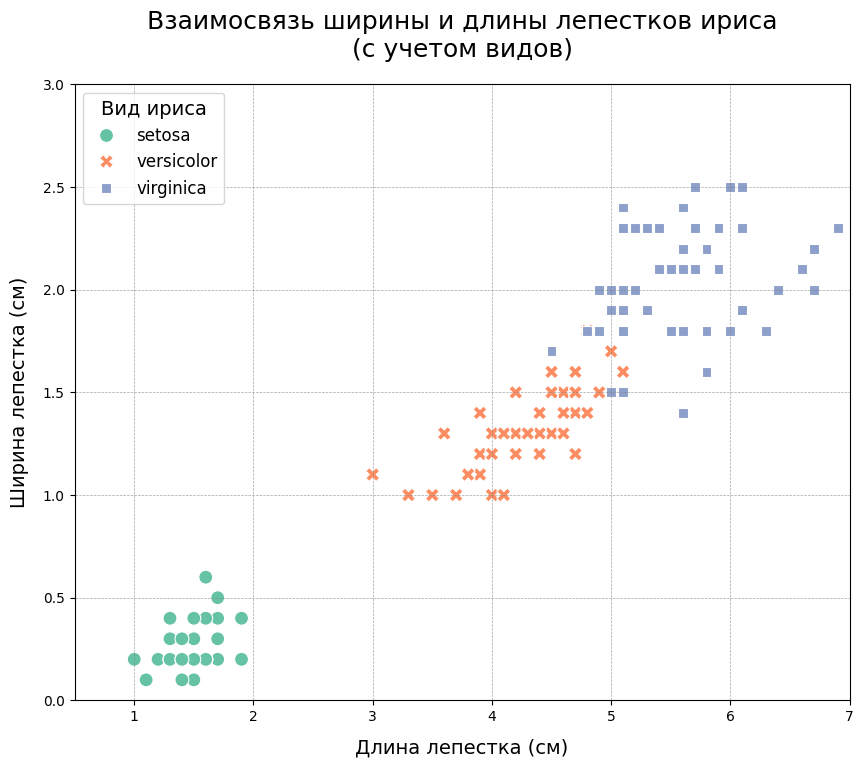

In [54]:
iris = sns.load_dataset('iris')

plt.figure(figsize=(10, 8))

scatter_plot = sns.scatterplot(
    data=iris,
    x='petal_length',
    y='petal_width',
    hue='species',
    palette='Set2',
    style='species',
    s=100
)

plt.xlabel('Длина лепестка (см)', fontsize=14, labelpad=10)
plt.ylabel('Ширина лепестка (см)', fontsize=14, labelpad=10)

plt.title(
    'Взаимосвязь ширины и длины лепестков ириса\n(с учетом видов)', 
    fontsize=18, 
    pad=20
)

plt.legend(
    title='Вид ириса',
    fontsize=12,
    title_fontsize=14,
    loc='upper left',
    frameon=True
)

plt.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.7)

plt.xlim(0.5, 7)
plt.ylim(0, 3)

plt.show()


Напишите, какие выводы можно сделать из графика. Чего графику не хватает, чтобы он был информативным?

<font color='red'>График показывает, что setosa имеет меньшие размеры лепестков, а у versicolor и virginica значения перекрываются. Для улучшения стоит уточнить значения осей,добавить разделяющие линии и подписи, чтобы было понятно, какой вид какой точке соответствует</font>

Давайте попробуем другие графики для тех же целей из библиотеки seaborn - `sns.jointplot`; кроме того, попробуйте выделить цветом точки на графике в зависимости от вида ириса - воспользуйтесь `sns.facetgrid`. В следующих ячейках выведите эти два графика и проанализируйте.

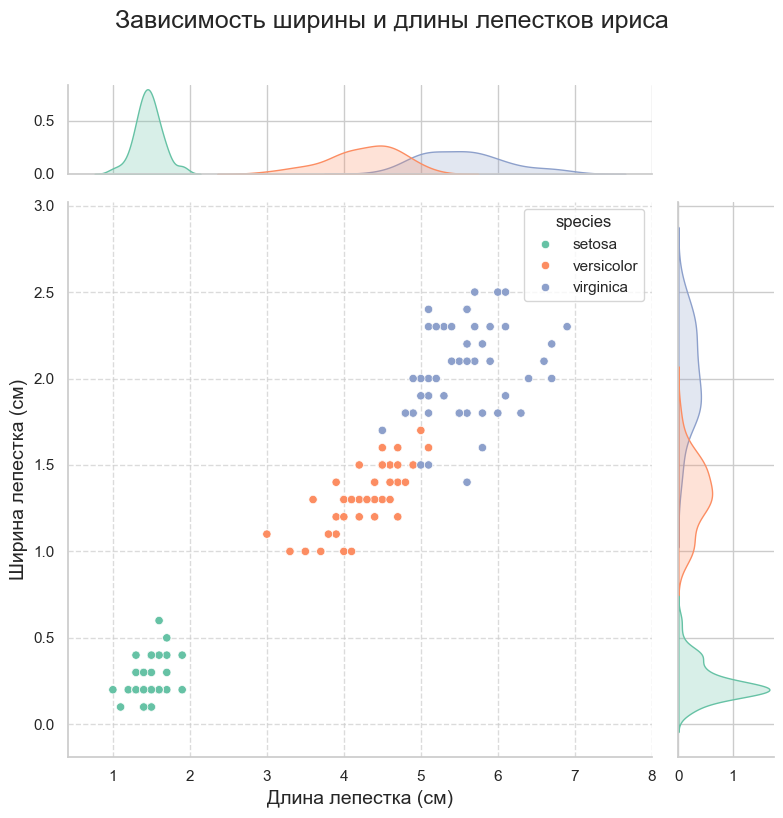

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

iris = sns.load_dataset('iris')

sns.set_theme(style="whitegrid")

joint = sns.jointplot(
    data=iris,
    x='petal_length',
    y='petal_width',
    hue='species',
    palette='Set2',
    kind='scatter',
    height=8,
    marginal_ticks=True
)

joint.fig.suptitle('Зависимость ширины и длины лепестков ириса', fontsize=18, y=1.02)
joint.ax_joint.set_xlabel('Длина лепестка (см)', fontsize=14)
joint.ax_joint.set_ylabel('Ширина лепестка (см)', fontsize=14)

joint.ax_joint.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()



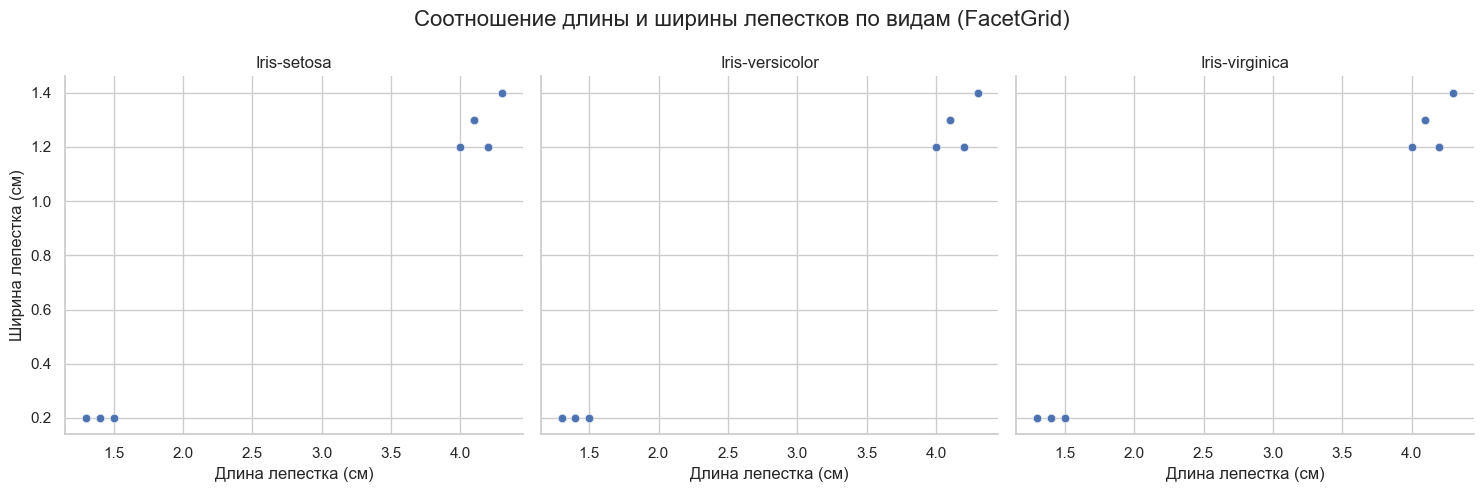

In [60]:
# FacetGrid
facet = sns.FacetGrid(df, col="Species", height=5, aspect=1)
facet.map(sns.scatterplot, "PetalLengthCm", "PetalWidthCm", alpha=0.7)
facet.set_axis_labels("Длина лепестка (см)", "Ширина лепестка (см)")
facet.set_titles("{col_name}")
facet.fig.suptitle("Соотношение длины и ширины лепестков по видам (FacetGrid)", fontsize=16)
facet.tight_layout()
plt.show()

Какие выводы можно сделать из этих графиков? Какой из 3 методов - scatterplot, jointplot, facetgrid вам кажется лучше?

<font color='red'>Из графиков видно, что длина и ширина лепестков различаются у каждого вида ирисов.У setosa лепестки значительно меньше и хорошо отделяются от других видов, тогда как значения для versicolor и virginica иногда перекрываются. Jointplot показывает как взаимосвязь между шириной и длиной лепестков, и их распределение. FacetGrid удобен для сравнения видов, но jointplot универсальнее. Таким образом, для данной задачи лучше всего подходит jointplot, так как он позволяет увидеть распределение данных по видам ириса и предоставляет наглядное разделение категорий. </font>

## 3.2 Графики распределений значений длины лепестка

Постройте график "ящика с усами" - `sns.boxplot` и его аналог - `sns.violinplot`. По оси Ox должны находиться возможные виды ирисов, по оси Oy.

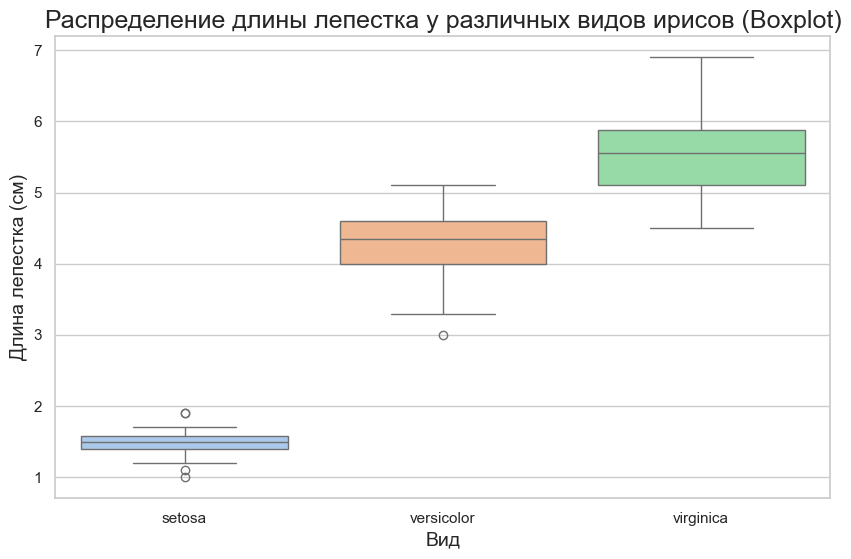

In [69]:
import seaborn as sns
import matplotlib.pyplot as plt

# Загрузка данных
iris = sns.load_dataset('iris')

# Построение графика Boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(
    data=iris,
    x='species',
    y='petal_length',
    palette='pastel',
    hue='species',  # Назначаем переменную x в hue
    dodge=False     # Убираем смещение для одного ящика на категорию
)

# Оформление
plt.xlabel('Вид', fontsize=14)
plt.ylabel('Длина лепестка (см)', fontsize=14)
plt.title('Распределение длины лепестка у различных видов ирисов (Boxplot)', fontsize=18)

plt.legend([], [], frameon=False)  # Убираем лишнюю легенду
plt.show()


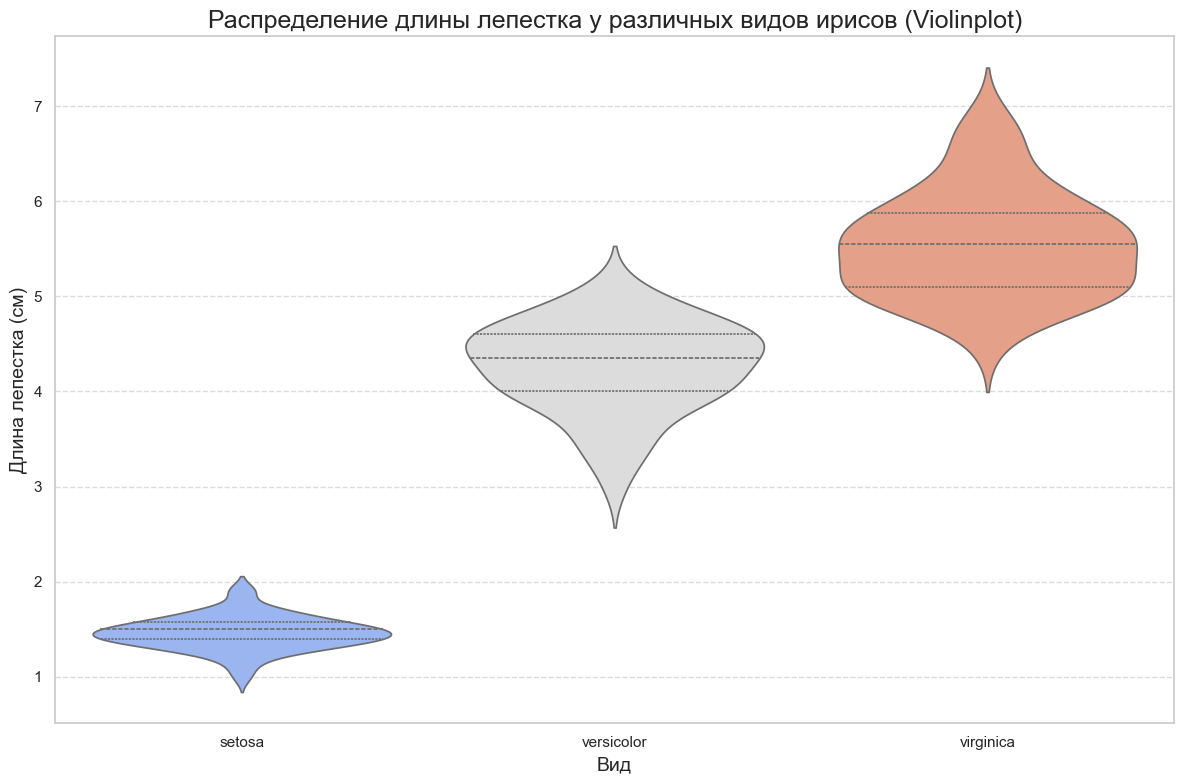

In [ ]:
iris = sns.load_dataset('iris')

plt.figure(figsize=(12, 8))
sns.violinplot(
    data=iris,
    x='species',
    y='petal_length',
    hue='species',
    palette='coolwarm',
    density_norm='width',
    inner='quartile'
)

plt.xlabel('Вид', fontsize=14)
plt.ylabel('Длина лепестка (см)', fontsize=14)
plt.title('Распределение длины лепестка у различных видов ирисов (Violinplot)', fontsize=18)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()



Сравните два вида графиков. Какой более информативный, а какой - более красивый визуально по вашему мнению? Какую информацию мы можем получить из этих графиков?

<font color='red'> Violinplot визуально более красивый, а Boxplot более информативный.Boxplot показывает основные статистические данные, как медиана и выбросы, и дает четкое представление о распределении данных, а Violinplot, кроме того, показывает плотность значений, что делает его более информативным </font>

## 3.3 Попарные графики взаимосвязи признаков


Давайте попробуем построить большую табличку из графиковв размера 4 на 4, где у нас находятся все возможные пары признаков (длина/ширина лепестка, длина/ширина чашелистика). Для этого воспользуйтесь `sns.pairplot` и не забудьте указать параметр `hue`.

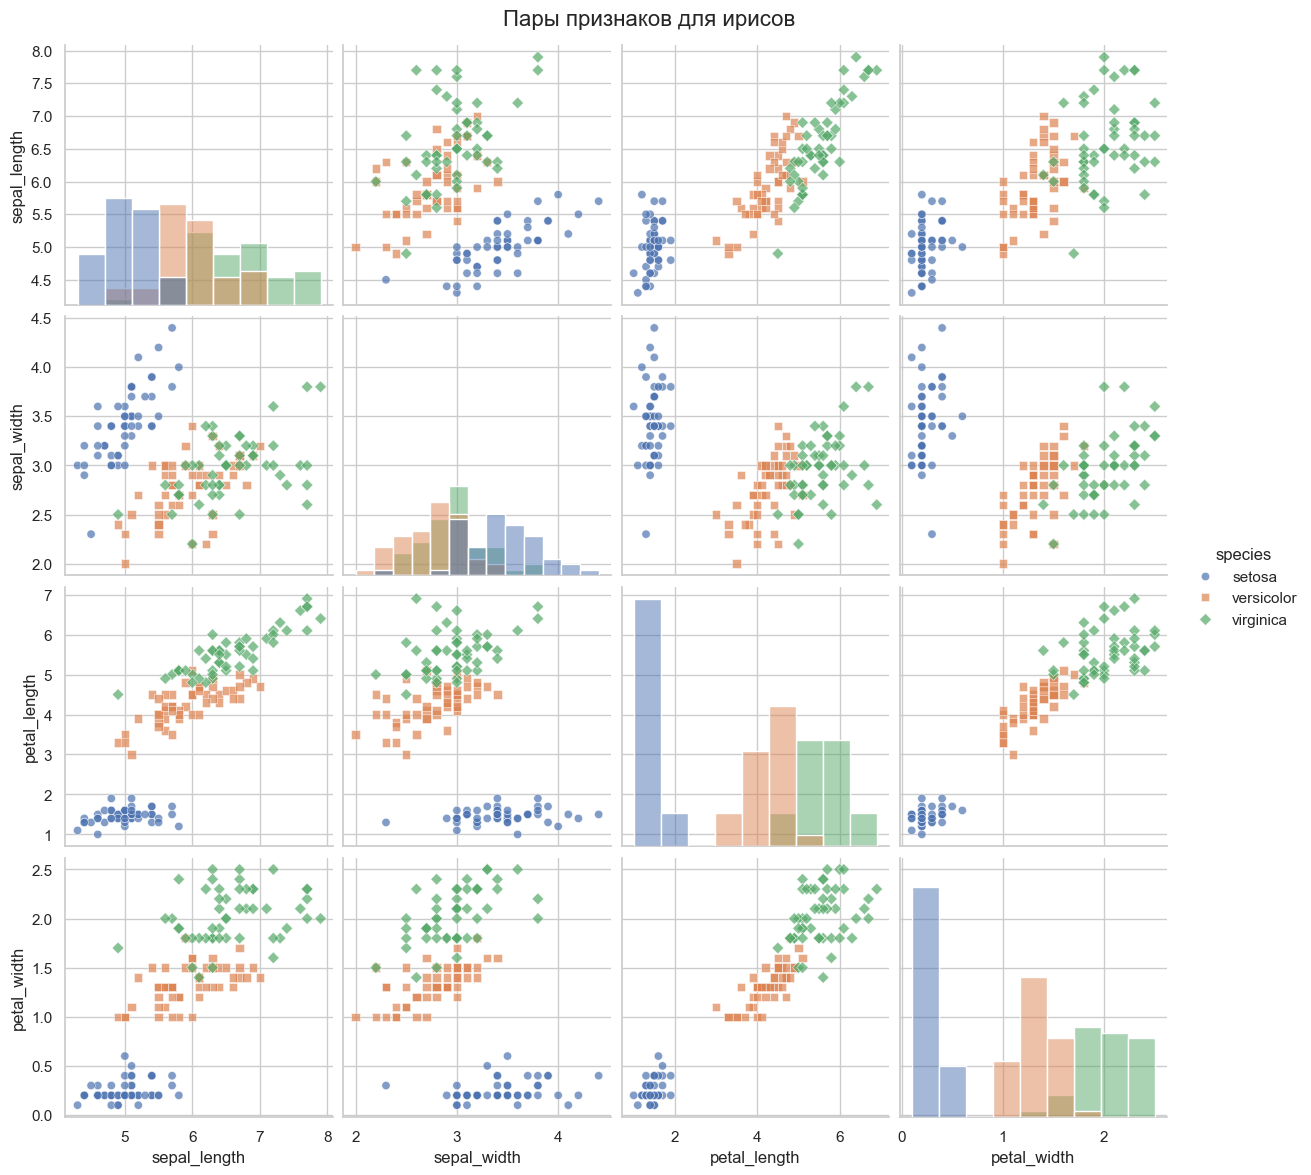

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

iris = sns.load_dataset('iris')

sns.pairplot(
    iris,
    hue='species',
    height=3,
    diag_kind='hist',
    markers=["o", "s", "D"],
    plot_kws={'alpha': 0.7},
)

plt.suptitle('Пары признаков для ирисов', fontsize=16)
plt.subplots_adjust(top=0.95)
plt.show()



Какую информацию о взаимосвязи признаков вы можете почерпнуть из полученного графика?

<font color='red'>Взаимосвязь между длиной и шириной лепестка. На всех графиках видно, что виды ирисов хорошо различимы по своим признакам. Гистограммы на диагоналях показывают распределение значений для каждого признака. Наличие выбросов. </font>

Какие графики находятся на диагонали этой таблицы?

<font color='red'> Гистограммы для длины и ширины лепестка и гистограммы для длины и ширины чашелистика   </font>

Попробуй заменить графики на диагонали таблицы на другие, возможно, более информативные (подсказка: в документации у `sns.pairplot` для этого есть специальный параметр). Выведи полученный график.

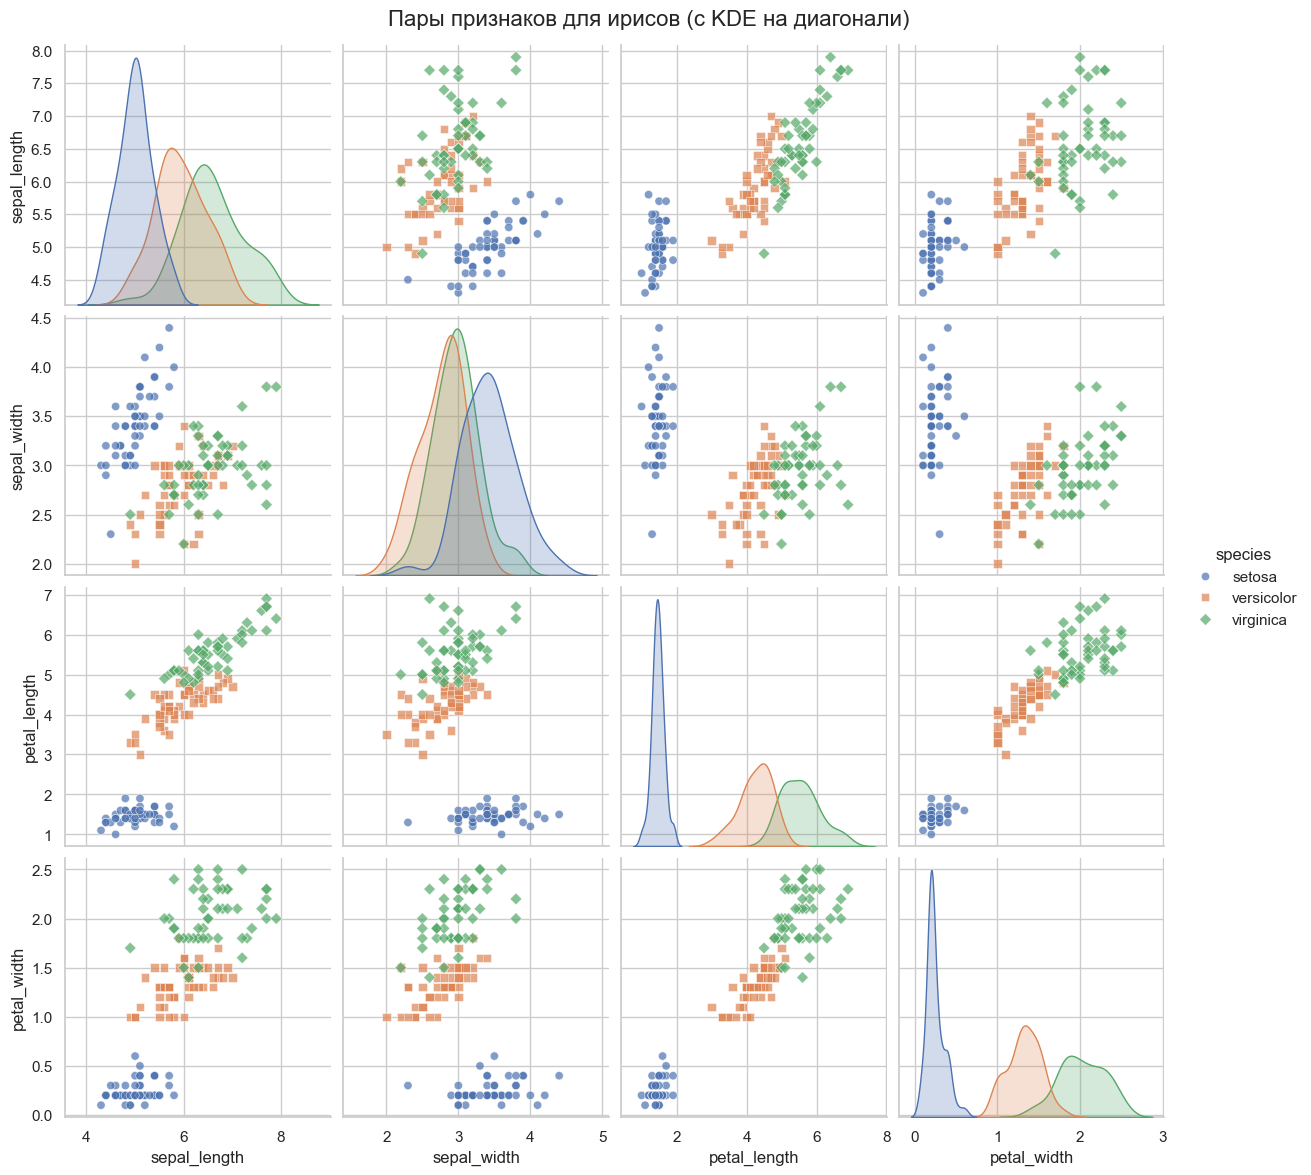

In [77]:
import seaborn as sns
import matplotlib.pyplot as plt

iris = sns.load_dataset('iris')

sns.pairplot(
    iris,
    hue='species',
    height=3,
    diag_kind='kde',
    markers=["o", "s", "D"],
    plot_kws={'alpha': 0.7},
)

plt.suptitle('Пары признаков для ирисов (с KDE на диагонали)', fontsize=16)
plt.subplots_adjust(top=0.95)

plt.show()


Какие графики теперь находятся на диагонали таблицы? Получилось ли более информативно?

<font color='red'> график плотности для длины лепестка и ширины лепестка. график плотности для длины чашелистика и ширины чашелистика</font>